In [285]:
import pandas as pd
import numpy as np

In [286]:
# import the upwelling radiance
# hemispherically integrated upwelling radiance
# W m-2 um-1
rad_df = pd.read_csv(r"C:\SCOPE-master\output\verification_run_2021-05-18-2141\Eout_spectrum.csv")
# solar irradiance
irr_df = pd.read_csv(r"C:\SCOPE-master\output\verification_run_2021-05-18-2134\Esun.csv")
# apparent refelctance
apref_df = pd.read_csv(r"C:\SCOPE-master\output\verification_run_2021-05-18-2134\apparent_reflectance.csv")
# flourescence
#fluorescence_spectrum 640:1:850 nm
#W m-2 um-1 sr-1
fluo_df = pd.read_csv(r"C:\SCOPE-master\output\verification_run_2021-05-18-2141\fluorescence.csv")

df = rad_df

In [379]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,16384
0,10.400,9.680,10.400,9.740,10.600,9.400,9.240,9.550,9.760,10.700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.600,13.700,14.800,13.800,15.000,13.300,13.100,13.500,13.800,15.200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.566,0.529,0.571,0.532,0.577,0.513,0.504,0.521,0.532,0.586,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.870,6.420,6.920,6.450,7.010,6.230,6.120,6.320,6.470,7.110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20.300,19.000,20.500,19.100,20.800,18.500,18.200,18.800,19.200,21.200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [380]:
df = df.dropna(axis=1)

In [381]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,2153,2154,2155,2156,2157,2158,2159,2160,2161,2162
0,10.400,9.680,10.400,9.740,10.600,9.400,9.240,9.550,9.760,10.700,...,1.33,1.23,1.14,1.05,0.977,0.908,0.845,0.787,0.734,0.685
1,14.600,13.700,14.800,13.800,15.000,13.300,13.100,13.500,13.800,15.200,...,1.34,1.24,1.14,1.06,0.984,0.915,0.851,0.792,0.739,0.690
2,0.566,0.529,0.571,0.532,0.577,0.513,0.504,0.521,0.532,0.586,...,1.38,1.27,1.18,1.09,1.010,0.940,0.874,0.814,0.759,0.708
3,6.870,6.420,6.920,6.450,7.010,6.230,6.120,6.320,6.470,7.110,...,1.46,1.35,1.25,1.16,1.070,0.995,0.925,0.861,0.802,0.748
4,20.300,19.000,20.500,19.100,20.800,18.500,18.200,18.800,19.200,21.200,...,1.38,1.27,1.18,1.09,1.010,0.940,0.874,0.814,0.758,0.708


In [382]:
import matplotlib.pyplot as plt

In [383]:
wavelengths = np.arange(1, 2163)

C:\Users\walla\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2020: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\walla\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0.5,0,'Wavlengths')

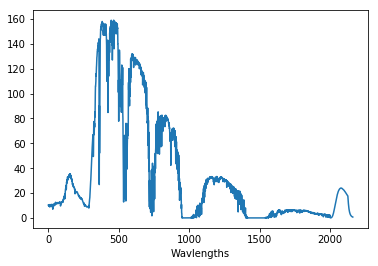

In [384]:
# plot modelled radiance spectra for first run
plt.plot(wavelengths, df.iloc[0])
plt.xlabel('Wavlengths')

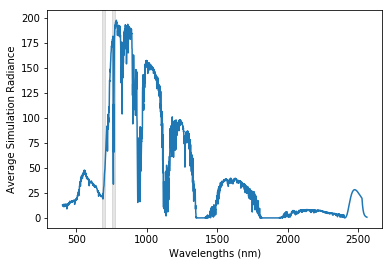

In [385]:
# now plot average values over all simulations
means = []
for i in range(1, 2163):
    col_name = str(i)
    means.append(df[col_name].mean())
plt.plot(wavelengths+400, means)
plt.xlabel('Wavelengths (nm)')
plt.ylabel('Average Simulation Radiance')
plt.axvspan(680, 700, color = 'k', alpha = 0.1)
plt.axvspan(750, 770, color = 'k', alpha = 0.1)

We now have a simulated radiance dataset at 1nm FWHM spectral resolution. Now, apply a Gaussian convolution to the simualted data to match the spectral resolution with the experimental resolution (~3.5nm FWHM).

In [386]:
# import Band Resampler function from Spectral py library
import spectral.io.aviris as aviris
from spectral import *


In [387]:
bands2 = np.arange(1, 2163, 3.5) # define the new band range with FWHM 3.5
resample = BandResampler(wavelengths, bands2)
x1 = means
x2 = resample(x1)

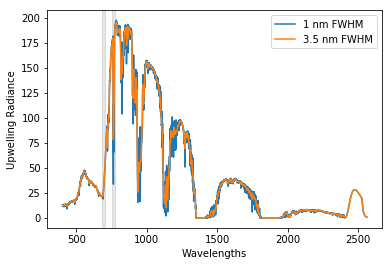

In [388]:
# plot new convoluted bands onto the original 1 nm model
plt.plot(wavelengths+400, means, label = '1 nm FWHM')
plt.plot(bands2+400, x2, label = '3.5 nm FWHM')
plt.xlabel('Wavelengths')
plt.ylabel('Upwelling Radiance')
plt.legend()
plt.axvspan(680, 700, color = 'k', alpha = 0.1)
plt.axvspan(750, 770, color = 'k', alpha = 0.1)

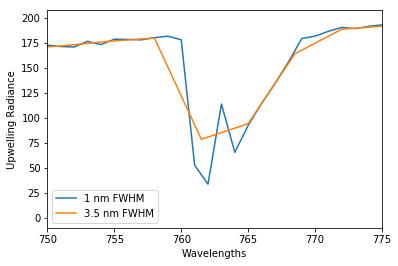

In [389]:
# plot new convoluted bands onto the original 1 nm model

# O2A Band

plt.plot(wavelengths+400, means, label = '1 nm FWHM')
plt.plot(bands2+400, x2, label = '3.5 nm FWHM')
plt.xlabel('Wavelengths')
plt.ylabel('Upwelling Radiance')
plt.xlim(750, 775)
plt.legend()

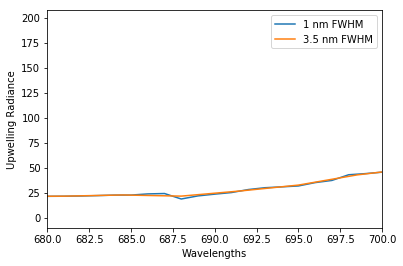

In [390]:
# plot new convoluted bands onto the original 1 nm model

# O2B Band

plt.plot(wavelengths+400, means, label = '1 nm FWHM')
plt.plot(bands2+400, x2, label = '3.5 nm FWHM')
plt.xlabel('Wavelengths')
plt.ylabel('Upwelling Radiance')
plt.xlim(680, 700)
plt.legend()

In [391]:
def convolute_radiance(target):
    bands = np.arange(1, 2163, target) # define the new band range with FWHM 3.5
    resample = BandResampler(wavelengths, bands)
    x1 = means
    x2 = resample(x1)
    return(bands, x2)

In [396]:
means = np.asarray(means)

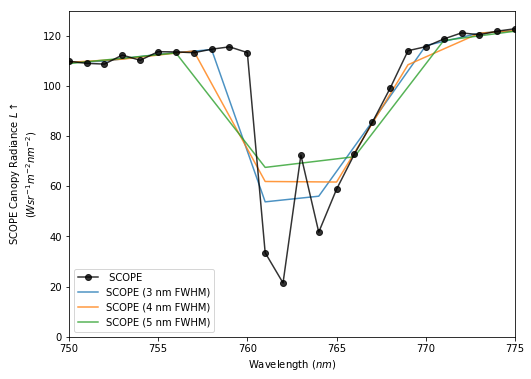

In [450]:
# create main plot

plt.figure(figsize = (8,6))
plt.plot(wavelengths+400, 2*means/np.pi, 'o-', label = ' SCOPE', zorder = 1, color = 'k', alpha = 0.8) 

for i in range(3, 6):
    plt.plot(convolute_radiance(i)[0]+400, 2*convolute_radiance(i)[1]/np.pi, label = 'SCOPE (%d nm FWHM)' % i, zorder = 0,
            alpha = 0.8)

   
    
plt.ylabel(r'SCOPE Canopy Radiance $L\uparrow$' + '\n' + '($W sr^{-1} m^{-2} nm^{-2}$)')
plt.xlabel('Wavelength ($nm$)')
plt.xlim(750, 775)
plt.ylim(0, 130)
plt.legend()
